# imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.sparse import csr_matrix
import seaborn as sns

# load movies and ratings

In [2]:
%matplotlib inline
movies = pd.read_csv('~/Downloads/ml-25m/movies.csv')
print(len(movies))
movies.head(5)

62423


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('~/Downloads/ml-25m/ratings.csv')
print(len(ratings))
ratings.head(5)

25000095


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
print(len(movies),len(ratings))

62423 25000095


# all genres categories

In [5]:
genres_categories = []
for i in range (len(movies['genres'])):
    temp = movies['genres'][i].split("|")
    for j in range (len(temp)):
        if temp[j] not in genres_categories and 'no' not in temp[j]:
            genres_categories.append(temp[j])
        
print(genres_categories)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir']


In [6]:
genres_categories

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'IMAX',
 'Documentary',
 'War',
 'Musical',
 'Western',
 'Film-Noir']

# input movies (choose as many as you want)

In [7]:
###################
### input movie ###
###################
input_movies = ['Toy Story','Jumanji','Grumpier Old Men','Father of the Bride Part II']

# input movies, output genres and weights

In [8]:
### input movies, output the genres and weights ###
input_genres = []
input_weights = [0 for i in range(20)]
for input_movie in input_movies:
    for all_movie_index in range (len(movies)):
        if input_movie in movies['title'][all_movie_index]:
            genres_temps = movies['genres'][all_movie_index].split("|")
            for genres_temp in genres_temps:
                if genres_temp not in input_genres:
                    input_genres.append(genres_temp)
                    temp_index=input_genres.index(genres_temp)
                    input_weights[temp_index] = input_weights[temp_index] + 1
                else:
                    temp_index=input_genres.index(genres_temp)
                    input_weights[temp_index] = input_weights[temp_index] + 1
input_weights = input_weights[:input_weights.index(0)]
print(input_genres)
print(input_weights)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'IMAX', 'Action', 'Romance']
[8, 9, 11, 10, 6, 1, 1, 1]


In [9]:
input_filtered_genres = []
for i in range (4):
    input_filtered_genres.append(input_genres[input_weights.index(np.max(input_weights))])
    input_weights[input_weights.index(np.max(input_weights))]=0

##################################
### filtered genres by weights ###
##################################
input_filtered_genres

['Children', 'Comedy', 'Animation', 'Adventure']

In [10]:
print(len(ratings),len(movies))

25000095 62423


In [11]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [12]:
drop_rows = []
for i in range (len(movies['genres'])):
    if input_filtered_genres[0] in movies['genres'][i].split("|")\
    and input_filtered_genres[1] in movies['genres'][i].split("|")\
    and input_filtered_genres[2] in movies['genres'][i].split("|")\
    and input_filtered_genres[3] in movies['genres'][i].split("|"):
        continue
    else:
        drop_rows.append(i)

filtered_movies = movies.drop(labels=drop_rows, axis=0)
print(len(filtered_movies))

162


In [13]:
filtered_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
580,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
661,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...
694,709,Oliver & Company (1988),Adventure|Animation|Children|Comedy|Musical
1192,1223,"Grand Day Out with Wallace and Gromit, A (1989)",Adventure|Animation|Children|Comedy|Sci-Fi
...,...,...,...
61715,206714,Abominable (2019),Adventure|Animation|Children|Comedy
61815,206959,Frozen II (2019),Adventure|Animation|Children|Comedy|Fantasy
61844,207065,Minuscule 2: Mandibles From Far Away (2019),Adventure|Animation|Children|Comedy
62304,208693,Pippi Longstocking (1997),Adventure|Animation|Children|Comedy


In [14]:
merge_rating_movie = pd.merge(ratings, filtered_movies[['movieId', 'title']], on='movieId')
merge_rating_movie.head(5)

,userId,movieId,rating,timestamp,title
0,1,6377,4.0,1147868469,Finding Nemo (2003)
1,3,6377,4.0,1439472644,Finding Nemo (2003)
2,4,6377,3.0,1573939584,Finding Nemo (2003)
3,12,6377,4.0,1167582434,Finding Nemo (2003)
4,13,6377,4.0,1238029123,Finding Nemo (2003)


In [15]:
merge_rating_movie

,userId,movieId,rating,timestamp,title
0,1,6377,4.0,1147868469,Finding Nemo (2003)
1,3,6377,4.0,1439472644,Finding Nemo (2003)
2,4,6377,3.0,1573939584,Finding Nemo (2003)
3,12,6377,4.0,1167582434,Finding Nemo (2003)
4,13,6377,4.0,1238029123,Finding Nemo (2003)
...,...,...,...,...,...
561639,85901,161826,0.5,1507416552,VeggieTales: Tomato Sawyer & Huckleberry Larry...
561640,120443,161826,3.5,1556501140,VeggieTales: Tomato Sawyer & Huckleberry Larry...
561641,85901,175625,0.5,1507417281,The Dragon Spell (2016)
561642,147687,175625,5.0,1500371728,The Dragon Spell (2016)


In [16]:
user_movie_ratings = pd.pivot_table(merge_rating_movie, index='userId', columns= 'title', values='rating')
print('dataset dimensions: ', user_movie_ratings.shape)
user_movie_ratings.head(5)

dataset dimensions:  (115201, 161)


title,Abominable (2019),Adventures in Zambezia (2012),"Adventures of Rocky and Bullwinkle, The (2000)",Aladdin (1992),Alpha and Omega (2010),Alvin and the Chipmunks: The Road Chip (2015),"American Tail, An (1986)","Ant Bully, The (2006)",Antz (1998),Asterix and Cleopatra (Astérix et Cléopâtre) (1968),...,Valiant (2005),VeggieTales: Dave and the Giant Pickle (1996),VeggieTales: Tomato Sawyer & Huckleberry Larry's Big River Rescue (2008),Wallace & Gromit in The Curse of the Were-Rabbit (2005),Wheely (2018),Who Framed Roger Rabbit? (1988),"Wild, The (2006)",Wonder Park (2019),"Wonderful World of the Brothers Grimm, The (1962)",Zootopia (2016)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,4.5
5,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
user_movie_ratings.head(5).fillna(" ")

title,Abominable (2019),Adventures in Zambezia (2012),"Adventures of Rocky and Bullwinkle, The (2000)",Aladdin (1992),Alpha and Omega (2010),Alvin and the Chipmunks: The Road Chip (2015),"American Tail, An (1986)","Ant Bully, The (2006)",Antz (1998),Asterix and Cleopatra (Astérix et Cléopâtre) (1968),...,Valiant (2005),VeggieTales: Dave and the Giant Pickle (1996),VeggieTales: Tomato Sawyer & Huckleberry Larry's Big River Rescue (2008),Wallace & Gromit in The Curse of the Were-Rabbit (2005),Wheely (2018),Who Framed Roger Rabbit? (1988),"Wild, The (2006)",Wonder Park (2019),"Wonderful World of the Brothers Grimm, The (1962)",Zootopia (2016)
userId,,,,,,,,,,,,,,,,,,,,,
1,,,,,,,,,,,...,,,,,,,,,,
2,,,,2,,,,,4.5,,...,,,,,,0.5,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,3.5,,,,,,4.5
5,,,,4,,,,,,,...,,,,,,,,,,


In [18]:
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    return most_rated_movies_users_selection

def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies

In [19]:
n_movies = 10
n_users = 10
most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies, n_users)
print('dataset dimensions: ', len(most_rated_movies_users_selection))
most_rated_movies_users_selection

dataset dimensions:  10


title,Toy Story (1995),Aladdin (1992),Shrek (2001),Finding Nemo (2003),"Monsters, Inc. (2001)","Incredibles, The (2004)",Toy Story 2 (1999),"Bug's Life, A (1998)",Who Framed Roger Rabbit? (1988),Shrek 2 (2004)
28445,4.5,4.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,3.5
76744,3.0,2.5,4.5,3.0,3.0,3.5,4.0,4.0,3.0,3.5
93968,4.0,5.0,4.0,4.5,4.0,3.5,4.0,4.5,4.5,4.0
36476,4.5,3.0,4.0,4.0,4.5,5.0,4.0,4.0,4.5,3.5
112399,1.5,4.5,1.0,3.5,4.0,1.5,1.0,3.0,4.5,0.5
20396,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,3.0
20399,3.0,3.5,4.5,3.0,3.0,4.0,3.0,1.5,2.5,3.5
76997,5.0,4.0,4.5,5.0,4.5,5.0,5.0,4.5,3.5,4.0
20425,2.5,3.5,3.0,2.5,3.5,4.5,2.0,3.0,4.0,2.5
77011,3.0,3.0,2.0,3.5,3.5,2.5,2.5,3.5,4.5,2.0


[Text(0.5, 15.0, 'movie names'), Text(33.0, 0.5, 'user ID')]

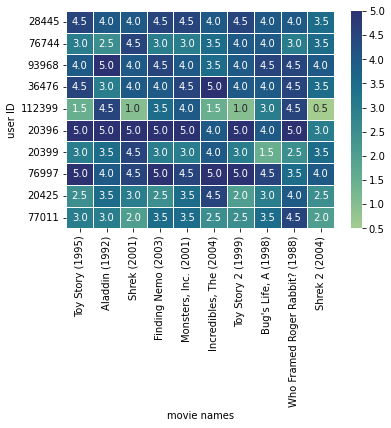

In [20]:
ax = sns.heatmap(most_rated_movies_users_selection,annot=True,fmt=".1f",linewidth=.5,cmap="crest")
ax.set(xlabel="movie names", ylabel="user ID")

In [21]:
user_movie_ratings =  pd.pivot_table(merge_rating_movie, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)

In [23]:
# sp_arr = csr_matrix(most_rated_movies_1k)
# sdf = pd.DataFrame.sparse.from_spmatrix(sp_arr).fillna(0)
# sparse_ratings = sdf.sparse.to_coo()
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

<ipython-input-23-e316158c512b>:4: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())


In [24]:
predictions = KMeans(n_clusters=20).fit_predict(sparse_ratings)
max_users = 500
max_movies = 162
clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

In [25]:
cluster_number = 11
n_users = 500
n_movies = 162
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)
cluster = sort_by_rating_density(cluster, n_movies, n_users)

In [26]:
cluster_number = 11
n_users = 500
n_movies = 162
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)
cluster = sort_by_rating_density(cluster, n_movies, n_users)

In [28]:
cluster.fillna('').head(10)

,Toy Story (1995),Shrek (2001),"Incredibles, The (2004)",Finding Nemo (2003),"Monsters, Inc. (2001)",Toy Story 2 (1999),Shrek 2 (2004),Aladdin (1992),"Bug's Life, A (1998)",Who Framed Roger Rabbit? (1988),...,Rock Dog (2016),Steven Universe: The Movie (2019),Wonder Park (2019),The Wind in the Willows (1995),Abominable (2019),Scooby-Doo! Mask of the Blue Falcon (2012),Trolls Holiday (2017),Penguin Highway (2018),UglyDolls (2019),Jungle Emperor Leo (1997)
2836,4,2.5,5,4.5,5,4,2,1,3,3,...,,,,,,,,,,
3145,2,1,2,2,4,2,1,3,3,3,...,,,,,,,,,,
2763,4,4,5,3,3.5,2.5,4,4,1,3,...,,,,,,,,,,
2783,3,3,2,4,2,4,1.5,0.5,3.5,1.5,...,,,,,,,,,,
3904,4,4,3.5,5,4,5,4,3,4,4,...,,,,,,,,,,
327,3.5,4,4.5,2.5,3,3,3,4,3,4,...,,,,,,,,,,
2842,5,4,5,4,4,5,3.5,3,,4,...,,,,,,,,,,
2532,4,3.5,4.5,4,4,2,0.5,4,,3.5,...,,,,,,,,,,
2653,3,3.5,2,2.5,4,2.5,1.5,,,3,...,,,,,,,,,,
4048,4,3,3.5,4,3.5,3.5,2,3.5,3,,...,,,,,,,,,,


In [29]:
cluster.mean().head(20)

Toy Story (1995)                                           3.937626
Shrek (2001)                                               3.750000
Incredibles, The (2004)                                    3.935223
Finding Nemo (2003)                                        3.838446
Monsters, Inc. (2001)                                      3.812115
Toy Story 2 (1999)                                         3.678495
Shrek 2 (2004)                                             3.380901
Aladdin (1992)                                             3.438228
Bug's Life, A (1998)                                       3.327945
Who Framed Roger Rabbit? (1988)                            3.481390
Ice Age (2002)                                             3.220207
Antz (1998)                                                2.949458
Wallace & Gromit in The Curse of the Were-Rabbit (2005)    3.675299
Grand Day Out with Wallace and Gromit, A (1989)            3.951456
Space Jam (1996)                                

In [30]:
cluster.mean().sort_values(ascending=False)[:20]

DuckTales: The Movie - Treasure of the Lost Lamp (1990)              4.250000
Rio 2 (2014)                                                         4.000000
Moana (2016)                                                         4.000000
Grand Day Out with Wallace and Gromit, A (1989)                      3.951456
Toy Story (1995)                                                     3.937626
Incredibles, The (2004)                                              3.935223
Paddington 2 (2017)                                                  3.916667
Fantastic Mr. Fox (2009)                                             3.870536
Finding Nemo (2003)                                                  3.838446
Monsters, Inc. (2001)                                                3.812115
Toy Story 3 (2010)                                                   3.769231
Asterix and Cleopatra (Astérix et Cléopâtre) (1968)                  3.750000
Shrek (2001)                                                    

In [28]:
user_id = 2003
user_2_ratings  = cluster.loc[user_id, :]
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]
avg_ratings.sort_values(ascending=False)[:20]

The Wind in the Willows (1995)                                       5.000000
SpongeBob Movie: Sponge Out of Water, The (2015)                     4.500000
Toy Story Toons: Hawaiian Vacation (2011)                            4.000000
Twelve Tasks of Asterix, The (Les douze travaux d'Astérix) (1976)    3.900000
Grand Day Out with Wallace and Gromit, A (1989)                      3.742857
Moana (2016)                                                         3.625000
Chipmunk Adventure, The (1987)                                       3.500000
Gruffalo, The (2009)                                                 3.500000
Toy Story 4 (2019)                                                   3.500000
Asterix and Cleopatra (Astérix et Cléopâtre) (1968)                  3.500000
Wallace & Gromit in The Curse of the Were-Rabbit (2005)              3.326923
Pirates! Band of Misfits, The (2012)                                 3.300000
Toy Story Toons: Small Fry (2011)                               

# filter out ratings

In [31]:
#####################
### input ratings ###
#####################
input_ratings = 4

In [32]:
input_filtered_genres_avg = []
for genre in input_filtered_genres:
    input_filtered_genres_avg.append(genre+'_avg_rating')

# plot by movies with means

In [35]:
genre_ratings = pd.DataFrame()
for genre in input_filtered_genres:
    genre_movies = movies[movies['genres'].str.contains(genre)]
    avg_genre_ratings_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])]\
    .loc[:, ['movieId', 'rating']].groupby(['movieId'])['rating'].mean().round(2)
    genre_ratings = pd.concat([genre_ratings, avg_genre_ratings_per_user], axis=1)
genre_ratings.columns = input_filtered_genres_avg
print( "Number of records: ", len(genre_ratings))
genre_ratings.head(5)

Number of records:  21437


,Children_avg_rating,Comedy_avg_rating,Animation_avg_rating,Adventure_avg_rating
1,3.89,3.89,3.89,3.89
2,3.25,NaN,NaN,3.25
3,NaN,3.14,NaN,NaN
4,NaN,2.85,NaN,NaN
5,NaN,3.06,NaN,NaN


In [36]:
biased_dataset = pd.DataFrame(genre_ratings.to_records())
print( "Number of records: ", len(biased_dataset))
biased_dataset.head(5)

Number of records:  21437


,index,Children_avg_rating,Comedy_avg_rating,Animation_avg_rating,Adventure_avg_rating
0,1,3.89,3.89,3.89,3.89
1,2,3.25,NaN,NaN,3.25
2,3,NaN,3.14,NaN,NaN
3,4,NaN,2.85,NaN,NaN
4,5,NaN,3.06,NaN,NaN


In [41]:
biased_dataset = biased_dataset.dropna()

In [42]:
biased_dataset['mean'] = biased_dataset.iloc[:, 1:5].mean(axis=1)
filtered_data = pd.DataFrame()
filtered_data = biased_dataset.loc[:, biased_dataset.columns.drop([input_filtered_genres_avg[0],
                                                                 input_filtered_genres_avg[1],
                                                                 input_filtered_genres_avg[2],
                                                                 input_filtered_genres_avg[3]])]
filtered_data.columns=['movieID','mean_ratings']
print( "Number of records: ", len(biased_dataset))
filtered_data.head(5)

Number of records:  162


,movieID,mean_ratings
0,1,3.89
269,588,3.70
310,673,2.76
319,709,3.31
535,1223,4.05


Text(0, 0.5, 'averaged ratings')

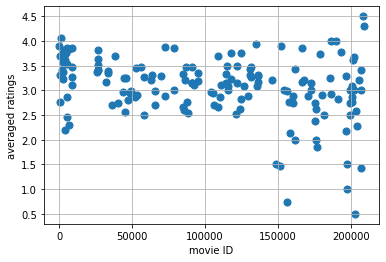

In [49]:
plt.grid()
plt.scatter(filtered_data['movieID'],filtered_data['mean_ratings'],s=50)
plt.xlabel("movie ID")
plt.ylabel("averaged ratings")